In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    roc_curve,
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
names = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "year",
    "origin",
    "model",
]

# '\s+' means "more than 1 space" you can download the
# data from the data_url to inspect the data and see why this makes sense
auto = pd.read_csv(data_url, sep="\s+", names=names)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,model
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


<IPython.core.display.Javascript object>

In [3]:
auto[auto.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,model
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe


<IPython.core.display.Javascript object>

In [4]:
auto = auto.dropna(subset=["mpg"])

<IPython.core.display.Javascript object>

In [5]:
auto["horsepower"] = auto["horsepower"].fillna(auto["horsepower"].median())

<IPython.core.display.Javascript object>

In [6]:
auto["make"] = auto["model"].str.split(" ").str[0]

<IPython.core.display.Javascript object>

In [7]:
make_counts = auto["make"].value_counts()
above_thresh_makes = make_counts[make_counts > 4]
keep_makes = above_thresh_makes.index

<IPython.core.display.Javascript object>

In [8]:
make_filter = auto["make"].isin(keep_makes)
auto.loc[-make_filter, "make"] = "other"
auto["make"].value_counts()

ford          51
chevrolet     43
plymouth      31
other         31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
honda         13
mercury       11
mazda         10
oldsmobile    10
peugeot        8
fiat           8
audi           7
chrysler       6
vw             6
volvo          6
renault        5
Name: make, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
X = auto.drop(columns=["mpg", "model", "displacement"])
y = auto["mpg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [10]:
cat_cols = ["make", "origin"]  # What categorical columns do we have?
drop_cats = ["other", 1.0]  # Which categories from those columns do we want to drop?

# The rest are numeric
num_cols = [c for c in X if c not in cat_cols]

<IPython.core.display.Javascript object>

In [11]:
preprocessing = ColumnTransformer(
    [
        ("scale", StandardScaler(), num_cols),
        ("one_hot_encode", OneHotEncoder(drop=drop_cats), cat_cols),
    ]
)

<IPython.core.display.Javascript object>

In [12]:
pipeline_knn = Pipeline(
    [
        # ("name of step", sklearn object with a fit method)
        ("preprocessing", preprocessing),
        ("knn", KNeighborsRegressor()),
    ]
)

<IPython.core.display.Javascript object>

In [13]:
pipeline_ols = Pipeline(
    [
        # ("name of step", sklearn object with a fit method)
        ("preprocessing", preprocessing),
        ("ols", LinearRegression()),
    ]
)

<IPython.core.display.Javascript object>

In [14]:
pipeline_ols.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['cylinders', 'horsepower',
                                                   'weight', 'acceleration',
                                                   'year']),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(categories='auto',
                                                                drop=['other',
                 

<IPython.core.display.Javascript object>

In [15]:
knn_train_score = pipeline_knn.score(X_train, y_train)
ols_train_score = pipeline_ols.score(X_train, y_train)

print(
    f"On the training data, knn scored {knn_train_score: .2f} and OLS scored {ols_train_score:.2f}"
)

On the training data, knn scored  0.88 and OLS scored 0.84


<IPython.core.display.Javascript object>

In [16]:
knn_test_score = pipeline_knn.score(X_test, y_test)
ols_test_score = pipeline_ols.score(X_test, y_test)

print(
    f"On the testing data, knn scored {knn_test_score: .2f} and OLS scored {ols_test_score:.2f}"
)

On the testing data, knn scored  0.89 and OLS scored 0.82


<IPython.core.display.Javascript object>

In [17]:
# both are a little bit overfit using the default parameters.
# Could be tuned. Let's look at predictions first

<IPython.core.display.Javascript object>

In [18]:
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_ols = pipeline_ols.predict(X_test)

<IPython.core.display.Javascript object>

In [19]:
(y_pred_knn - y_pred_ols).mean()
# on average, knn is predicting a little bit lower than OLS on average

-0.19347929000802988

<IPython.core.display.Javascript object>

In [20]:
model_df = pd.concat((X, y), 1)
model_df

,cylinders,horsepower,weight,acceleration,year,origin,make,mpg
0,8.0,130.0,3504.0,12.0,70.0,1.0,chevrolet,18.0
1,8.0,165.0,3693.0,11.5,70.0,1.0,buick,15.0
2,8.0,150.0,3436.0,11.0,70.0,1.0,plymouth,18.0
3,8.0,150.0,3433.0,12.0,70.0,1.0,amc,16.0
4,8.0,140.0,3449.0,10.5,70.0,1.0,ford,17.0
...,...,...,...,...,...,...,...,...
401,4.0,86.0,2790.0,15.6,82.0,1.0,ford,27.0
402,4.0,52.0,2130.0,24.6,82.0,2.0,vw,44.0
403,4.0,84.0,2295.0,11.6,82.0,1.0,dodge,32.0
404,4.0,79.0,2625.0,18.6,82.0,1.0,ford,28.0


<IPython.core.display.Javascript object>

In [21]:
resid_knn = y_pred_knn - y_test
resid_ols = y_pred_ols - y_test

<IPython.core.display.Javascript object>

In [22]:
mae_knn = np.mean(np.abs((resid_knn)))
mae_ols = np.mean(np.abs((resid_ols)))

print(
    f"In MAE, KNN scored within {mae_knn:.2f}mpg and OLS scored within {mae_ols:.2f}mpg"
)

In MAE, KNN scored within 1.87mpg and OLS scored within 2.49mpg


<IPython.core.display.Javascript object>

In [23]:
mape_knn = np.mean(np.abs((resid_knn / y_test)))
mape_ols = np.mean(np.abs((resid_ols / y_test)))

print(
    f"In MAPE, KNN scored within {mape_knn:.2f}% and OLS scored within {mape_ols:.2f}%"
)

In MAPE, KNN scored within 0.08% and OLS scored within 0.13%


<IPython.core.display.Javascript object>

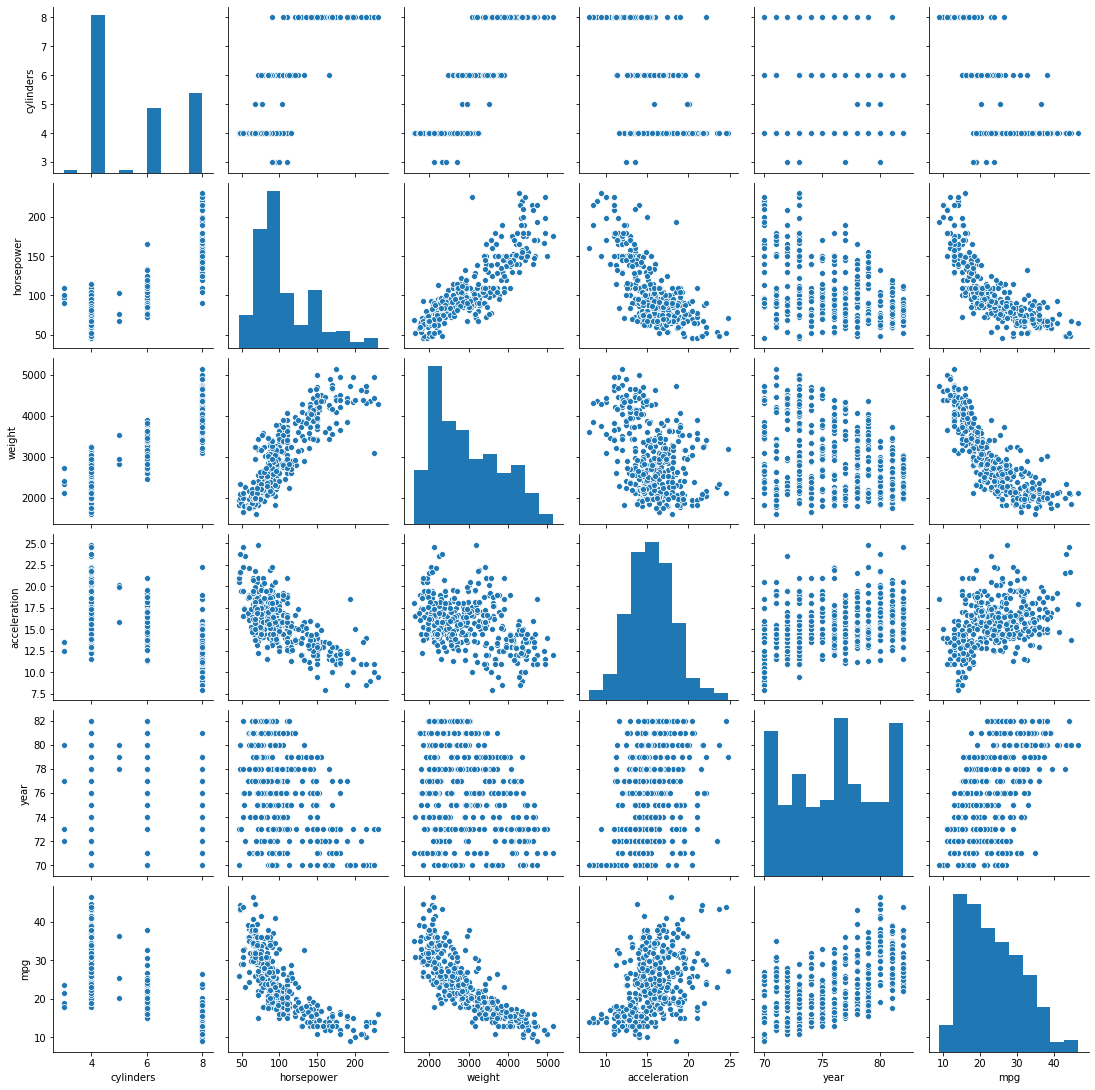

<IPython.core.display.Javascript object>

In [24]:
sns.pairplot(data=model_df.drop(["make", "origin"], 1))

# OLS vs KNN

I think for this data in particular, KNN seems to be a much better model than OLS. I think this largely comes down to the relationships between hte features and the target (mpg) isn't perfectly linear. Looking at the bottom row of the pairplot there it appears that there will be a lot of heteroscedasticity. Also, I believe due to the interconnected nature of the way a car or engine works, many of these factors lack definitive independency. KNN seems to be better at finding the trends that exist when changing one factor that affects another. 

One advantage would certainly be interpretability of OLS. With the the way we encoded the variables here, it's difficult to know exactly what coefficients line up with the original variables. It could be rewritten to use pd.get_dummies() to get a more descriptive answer.

If we were to change the target variable to weight perhaps, we might see better results due to there being more linear relationship. I tried that below and the OLS performed much better than on the weight target than the mpg. It even beat KNN model in the testing score.

In [25]:
X = auto.drop(columns=["weight", "model", "displacement"])
y = auto["weight"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

In [26]:
cat_cols = ["make", "origin"]  # What categorical columns do we have?
drop_cats = ["other", 1.0]  # Which categories from those columns do we want to drop?

# The rest are numeric
num_cols = [c for c in X if c not in cat_cols]

<IPython.core.display.Javascript object>

In [27]:
preprocessing = ColumnTransformer(
    [
        ("scale", StandardScaler(), num_cols),
        ("one_hot_encode", OneHotEncoder(drop=drop_cats), cat_cols),
    ]
)

<IPython.core.display.Javascript object>

In [28]:
pipeline_knn = Pipeline(
    [
        # ("name of step", sklearn object with a fit method)
        ("preprocessing", preprocessing),
        ("knn", KNeighborsRegressor()),
    ]
)

<IPython.core.display.Javascript object>

In [29]:
pipeline_ols = Pipeline(
    [
        # ("name of step", sklearn object with a fit method)
        ("preprocessing", preprocessing),
        ("ols", LinearRegression()),
    ]
)

<IPython.core.display.Javascript object>

In [30]:
pipeline_ols.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scale',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['mpg', 'cylinders',
                                                   'horsepower', 'acceleration',
                                                   'year']),
                                                 ('one_hot_encode',
                                                  OneHotEncoder(categories='auto',
                                                                drop=['other',
                    

<IPython.core.display.Javascript object>

In [31]:
knn_train_score = pipeline_knn.score(X_train, y_train)
ols_train_score = pipeline_ols.score(X_train, y_train)

print(
    f"On the training data, knn scored {knn_train_score: .2f} and OLS scored {ols_train_score:.2f}"
)

On the training data, knn scored  0.92 and OLS scored 0.92


<IPython.core.display.Javascript object>

In [32]:
knn_test_score = pipeline_knn.score(X_test, y_test)
ols_test_score = pipeline_ols.score(X_test, y_test)

print(
    f"On the testing data, knn scored {knn_test_score: .2f} and OLS scored {ols_test_score:.2f}"
)

On the testing data, knn scored  0.89 and OLS scored 0.90


<IPython.core.display.Javascript object>

In [34]:
ct.transformers_[0][1]

NameError: name 'ct' is not defined

<IPython.core.display.Javascript object>

In [33]:
cat_names = ct.transformers_[0][1].get_feature_names(cat_cols)
cat_names = list(cat_names)
new_col_names = cat_names + num_cols + bin_colsX_train = pd.DataFrame(
    X_train_trans, columns=new_col_names
)
X_test = pd.DataFrame(X_test_trans, columns=new_col_names)

SyntaxError: can't assign to operator (<ipython-input-33-72d9c26d1f37>, line 3)

<IPython.core.display.Javascript object>